# The *ecco_access* "package": a starting point for accessing ECCO output on PO.DAAC

Andrew Delman, updated 2024-10-06

## Introduction

In the past several years since ECCOv4 release 4 output was made available on the Physical Oceanography Distributed Active Archive Center or [PO.DAAC](https://podaac.jpl.nasa.gov), a number of Python scripts/functions have been written to facilitate requests of this output, authored by Jack McNelis, Ian Fenty, and Andrew Delman. To make access easier and standardize the format of these requests, the **ecco_access** library has been made available in the `ecco-access` folder of the [ECCO-v4-Python-Tutorial](https://github.com/ECCO-GROUP/ECCO-v4-Python-Tutorial/tree/master/ecco_access) Github repository.

This library I am calling a "package" in quotes because it currently has the core structure of any package you would install using `conda` or `pip`; there is an `__init__.py` file that allows you to access all of the library's modules and the functions within, using a single `import ecco_access` command. However, this "package" is not available through `conda` or `pip` yet. For the convenience of the ECCO Hackathon, **ecco_access** has been copied over to the `ecco-2024` repo used in the hackathon, with symbolic links included in the existing tutorial directories so that these tutorials can immediately use the library.

## Add *ecco_access* to your Python path

For more extensive use of this "package" (and sharing any edits with the community), I recommend cloning the *ECCO-v4-Python-Tutorial* repo and then adding the `ecco_access` folder to your Python path, using the steps below.

### Clone the *ECCO-v4-Python-Tutorial* repository

Navigate to your home directory before cloning the *ECCO-v4-Python-Tutorial* repo. This way the repo will appear as a directory under your home directory and is easily accessed.

```
cd ~
(notebook) jovyan@jupyter-adelman:~$ git clone git@github.com:ECCO-GROUP/ECCO-v4-Python-Tutorial.git
```

### Add symlink pointing from your path

We need to put the `ecco_access` folder from this repository into the search path for Python packages. There are at least two ways to do this. If you will have most or all of your Python-based notebooks and codes in one directory, you can create a symbolic link (symlink) from that directory (which is in the search path by default) to `ecco_access`. For instance, if the directory containing your codes is `~/working_repo/code_dir`:

```
(notebook) jovyan@jupyter-adelman:~$ ln -s ~/ECCO-v4-Python-Tutorial/ecco_access ~/working_repo/code_dir
```

Alternatively, you can have the symlink point from a directory that is in the standard Python path; to identify these directories use ```python -c "import sys; print(sys.path)"```:

```
(notebook) jovyan@jupyter-adelman:~$ python -c "import sys; print(sys.path)"
['', '/srv/conda/envs/notebook/lib/python311.zip', '/srv/conda/envs/notebook/lib/python3.11', '/srv/conda/envs/notebook/lib/python3.11/lib-dynload', '/srv/conda/envs/notebook/lib/python3.11/site-packages']
```

We'll use the last directory listed in the path:

```
(notebook) jovyan@jupyter-adelman:~$ ln -s ~/ECCO-v4-Python-Tutorial/ecco_access /srv/conda/envs/notebook/lib/python3.11/site-packages/ecco_access
```


## Using the `ecco_podaac_to_xrdataset` function

Perhaps the most convenient way to use *ecco_access* is the `ecco_podaac_to_xrdataset`; it takes as input a *query* consisting of NASA Earthdata dataset ShortNames or ECCO variables, and outputs an *xarray* Dataset. Let's look at the syntax:

In [1]:
import numpy as np
import xarray as xr
from os.path import join,expanduser

import ecco_access as ea

In [2]:
help(ea.ecco_podaac_to_xrdataset)

Help on function ecco_podaac_to_xrdataset in module ecco_access.ecco_access:

ecco_podaac_to_xrdataset(query, version='v4r4', grid=None, time_res='all', StartDate=None, EndDate=None, snapshot_interval=None, mode='download_ifspace', download_root_dir=None, **kwargs)
    This function queries and accesses ECCO datasets from PO.DAAC. The core query and download functions are adapted from Jupyter notebooks 
    created by Jack McNelis and Ian Fenty 
    (https://github.com/ECCO-GROUP/ECCO-ACCESS/blob/master/PODAAC/Downloading_ECCO_datasets_from_PODAAC/README.md)
    and modified by Andrew Delman (https://ecco-v4-python-tutorial.readthedocs.io).
    It is similar to ecco_podaac_access, except instead of a list of URLs or files, 
    an xarray Dataset with all of the queried ECCO datasets is returned.
    
    Parameters
    ----------    
    query: str, list, or dict, defines datasets or variables to access.
           If query is str, it specifies either a dataset ShortName (which is 
   

There are a lot of options that you *can* use to "submit" a query with this function. Let's consider a simple case, where we already have the ShortName for the [monthly native grid SSH](https://raw.githubusercontent.com/ECCO-GROUP/ECCO-v4-Python-Tutorial/master/varlist/v4r4_nctiles_monthly_varlist.txt) from ECCOv4r4 (**ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4**), and we want to access output from the year 2017. The ShortName goes in the query field, and we can specify start and end dates (in *YYYY-MM* or *YYYY-MM-DD* format). The other options that matter most for this request are the *mode*, and depending on the mode, the *download_root_dir* or the *jsons_root_dir*.

Let's try the **download** mode, which retrieves the data over the Internet using NASA Earthdata URLs (this should work on any machine with Internet access, including cloud environments):

In [3]:
# identify user's home directory
user_home_dir = expanduser('~')

# download data and open xarray dataset
curr_shortname = 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4'
ds_SSH = ea.ecco_podaac_to_xrdataset(curr_shortname,\
                                        StartDate='2017-01',EndDate='2017-12',\
                                        mode='download',\
                                        download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC'))

created download directory /home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4
DL Progress: 100%|#########################| 12/12 [00:04<00:00,  2.80it/s]

total downloaded: 71.02 Mb
avg download speed: 16.52 Mb/s
Time spent = 4.298169136047363 seconds




We specified a *root* directory for the download (which also happens to be the default setting), and the data files are then placed under *download_root_dir* / ShortName. We can verify that the contents of the file are what we queried:

In [4]:
ds_SSH

<xarray.Dataset> Size: 25MB
Dimensions:    (time: 12, tile: 13, j: 90, i: 90, i_g: 90, j_g: 90, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 96B 2017-01-16T12:00:00 ... 2017-12-16T0...
    ...         ...
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    SSH        (time, tile, j, i) float32 5MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    SSHIBC     (time, tile, j, i) float32 5MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    SSHNOIBC   (time, tile, j, i) float32 5MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    ETAN       (time, tile, j, i) float32 5MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2017-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2017-01-01T00:00:00
    title:                        ECCO Sea Surface Height - Monthly Mean llc9...
    uuid:                         a21a5c30-400c-11eb-a9e0-0cc47a3f49c3

Now, if you are part of the ECCO Hackweek you are also working in a cloud environment which means that you have many more access modes open to you. Let's try **s3_open_fsspec**, which opens the files from S3 (no download necessary), and uses json files with the data chunking information to open the files exceptionally fast. This means you need to provide the directory where the jsons are located, on the `efs_ecco` drive: `~/efs_ecco/mzz-jsons`.

In [5]:
ds_SSH_s3 = ea.ecco_podaac_to_xrdataset(curr_shortname,\
                                        StartDate='2017-01',EndDate='2017-12',\
                                        mode='s3_open_fsspec',\
                                        jsons_root_dir=join(user_home_dir,'efs_ecco','mzz-jsons'))

In [6]:
ds_SSH_s3

<xarray.Dataset> Size: 25MB
Dimensions:    (time: 12, tile: 13, j: 90, i: 90, nb: 4, j_g: 90, i_g: 90, nv: 2)
Coordinates: (12/13)
    XC         (tile, j, i) float32 421kB ...
    XC_bnds    (tile, j, i, nb) float32 2MB ...
    XG         (tile, j_g, i_g) float32 421kB ...
    YC         (tile, j, i) float32 421kB ...
    YC_bnds    (tile, j, i, nb) float32 2MB ...
    YG         (tile, j_g, i_g) float32 421kB ...
    ...         ...
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 96B 2017-01-16T12:00:00 ... 2017-12-16T0...
    time_bnds  (time, nv) datetime64[ns] 192B ...
Dimensions without coordinates: nb, nv
Data variables:
    ETAN       (time, tile, j, i) float32 5MB ...
    SSH        (time, tile, j, i) float32 5MB ...
    SSHIBC     (time, tile, j, i) float32 5MB ...
    SSHNOIBC   (time, tile, j, i) float32 5MB ...
Attributes: (12/57)
    Conventions:                  CF-1.8, ACDD-1.3
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            1992-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Sea Surface Height - Monthly Mean llc9...
    uuid:                         9302811e-400c-11eb-b69e-0cc47a3f49c3

Now plot the SSH for Jan 2017 in tile 10 (Python numbering convention; 11 in Fortran/MATLAB numbering convention):

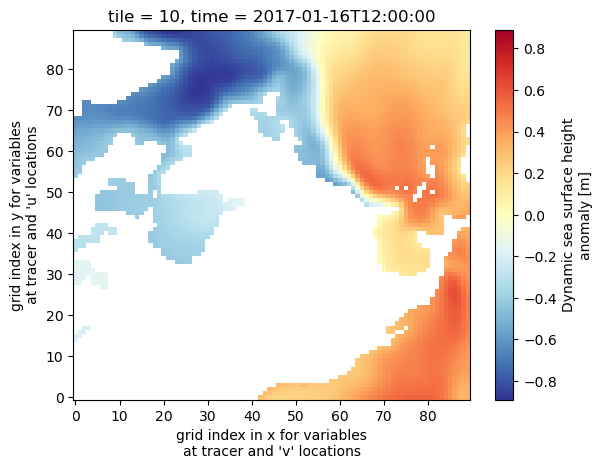

In [7]:
ds_SSH_s3.SSH.isel(time=0,tile=10).plot(cmap='RdYlBu_r')

## Using `ecco_podaac_access`

The `ecco_podaac_to_xrdataset` function that was previously used invokes `ecco_podaac_access` under the hood, and `ecco_podaac_access` can also be called directly. This can be useful if you want to obtain a list of file objects/paths or URLs that you can then process with your own code. Let's use this function with mode = `s3_open` (all `s3` modes only work from an AWS cloud environment in region `us-west-2`).

In [8]:
files_dict = ea.ecco_podaac_access(curr_shortname,\
                                    StartDate='2017-01',EndDate='2017-12',\
                                    mode='s3_open')

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2017-01-02,2017-12-31'}

Total number of matching granules: 12


In [9]:
files_dict[curr_shortname]

[<File-like object S3FileSystem, podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2017-01_ECCO_V4r4_native_llc0090.nc>,
 <File-like object S3FileSystem, podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2017-02_ECCO_V4r4_native_llc0090.nc>,
 <File-like object S3FileSystem, podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2017-03_ECCO_V4r4_native_llc0090.nc>,
 <File-like object S3FileSystem, podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2017-04_ECCO_V4r4_native_llc0090.nc>,
 <File-like object S3FileSystem, podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2017-05_ECCO_V4r4_native_llc0090.nc>,
 <File-like object S3FileSystem, podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2017-06_ECCO_V4r4_native_llc0090.nc>,
 <File-lik

The output of `ecco_podaac_access` is in the form of a dictionary with ShortNames as keys. In this case, the value associated with this ShortName is a list of 12 file objects. These are files on `S3` (AWS's cloud storage system) that have been opened, which is a necessary step for the files' data to be accessed. The list of open files can be passed directly to `xarray.open_mfdataset`.

In [10]:
ds_SSH_fromlist = xr.open_mfdataset(files_dict[curr_shortname],\
                                    compat='override',data_vars='minimal',coords='minimal',\
                                    parallel=True)

In [11]:
ds_SSH_fromlist

<xarray.Dataset> Size: 25MB
Dimensions:    (time: 12, tile: 13, j: 90, i: 90, i_g: 90, j_g: 90, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 96B 2017-01-16T12:00:00 ... 2017-12-16T0...
    ...         ...
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    SSH        (time, tile, j, i) float32 5MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    SSHIBC     (time, tile, j, i) float32 5MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    SSHNOIBC   (time, tile, j, i) float32 5MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    ETAN       (time, tile, j, i) float32 5MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2017-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2017-01-01T00:00:00
    title:                        ECCO Sea Surface Height - Monthly Mean llc9...
    uuid:                         a21a5c30-400c-11eb-a9e0-0cc47a3f49c3

## Access modes

Both of the *ecco_access* functions demonstrated above can use a number of access **modes**. In this section (meant to be run in a cloud environment) we will compare how these modes work.

### Query-only modes (`ls`/`query`, `s3_ls`/`s3_query`)

These modes return the URLs (`ls`/`query`) or S3 file paths (`s3_ls`/`s3_query`) to access the ECCO output. These modes only work with `ecco_podaac_access`, since we are not opening a dataset, just querying the location of the data.

>[!NOTE]
>The `ls` and `query` modes are interchangeable and have the same functionality, just by different names. The same is true for `s3_ls` and `s3_query`.

In [12]:
SSH_shortname = 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4'
windstr_shortname = 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4'

urls_dict = ea.ecco_podaac_access([SSH_shortname,windstr_shortname],\
                                    StartDate='2010-01',EndDate='2010-06',\
                                    mode='ls')

In [13]:
urls_dict[SSH_shortname]

['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFAC

In [14]:
urls_dict[windstr_shortname]

['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4/OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4/OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4/OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4/OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4/OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-

If working in an AWS cloud environment, you can also use the `s3_ls`/`s3_query` mode:

In [15]:
s3_paths_dict = ea.ecco_podaac_access([SSH_shortname,windstr_shortname],\
                                        StartDate='2010-01',EndDate='2010-06',\
                                        mode='s3_query')

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}
{'ShortName': 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}


In [16]:
s3_paths_dict

{'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4': ['s3://podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc',
  's3://podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc',
  's3://podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc',
  's3://podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc',
  's3://podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc',
  's3://podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-06_ECCO_V4r4_native_llc0090.nc'],
 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4': ['s3://podaac-ops-cumulus-protected/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4

The dictionary returned has the locations of each of the queried files on `S3`. Note that to read the data, the files need to be opened, e.g. using [s3fs](https://s3fs.readthedocs.io/en/latest/#examples) and NASA Earthdata authentication. 

In [17]:
# log in to NASA Earthdata
# (will prompt for credentials if they are not already in ~/.netrc)
ea.setup_earthdata_login_auth()

import requests
import s3fs

# obtain NASA Earthdata credentials for in-cloud S3 access
creds = requests.get('https://archive.podaac.earthdata.nasa.gov/s3credentials').json()
s3 = s3fs.S3FileSystem(anon=False,
                       key=creds['accessKeyId'],
                       secret=creds['secretAccessKey'],
                       token=creds['sessionToken'])

# use list comprehension to open files 
# and create list that can be passed to xarray file opener
open_SSH_files = [s3.open(file) for file in s3_paths_dict[SSH_shortname]]

# open xarray dataset
ds_SSH_curr = xr.open_mfdataset(open_SSH_files,\
                                compat='override',data_vars='minimal',coords='minimal',\
                                parallel=True)

In [18]:
ds_SSH_curr

<xarray.Dataset> Size: 15MB
Dimensions:    (time: 6, tile: 13, j: 90, i: 90, i_g: 90, j_g: 90, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 48B 2010-01-16T12:00:00 ... 2010-06-16
    ...         ...
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] 96B dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    SSH        (time, tile, j, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    SSHIBC     (time, tile, j, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    SSHNOIBC   (time, tile, j, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    ETAN       (time, tile, j, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2010-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2010-01-01T00:00:00
    title:                        ECCO Sea Surface Height - Monthly Mean llc9...
    uuid:                         9ce7afa6-400c-11eb-ab45-0cc47a3f49c3

### `download` mode

The `download` mode directly downloads the queried files under a root directory of your choosing, creating the directory if needed. If `ecco_podaac_access` is called using this mode, the dictionary returned includes list(s) of the downloaded files that can be passed to `xarray.open_mfdataset` (or `xarray.open_dataset`, one file at a time). If `ecco_podaac_to_xrdataset` is used, the `xarray.open_mfdataset` step is included and an `xarray` Dataset is returned.

In [19]:
files_dict = ea.ecco_podaac_access([SSH_shortname,windstr_shortname],\
                                    StartDate='2010-01',EndDate='2010-06',\
                                    mode='download',\
                                    download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC'))

created download directory /home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4
DL Progress: 100%|###########################| 6/6 [00:02<00:00,  2.28it/s]

total downloaded: 35.5 Mb
avg download speed: 13.44 Mb/s
Time spent = 2.6406123638153076 seconds


created download directory /home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4
DL Progress: 100%|###########################| 6/6 [00:02<00:00,  2.46it/s]

total downloaded: 35.79 Mb
avg download speed: 14.6 Mb/s
Time spent = 2.451402187347412 seconds




In [20]:
files_dict

{'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4': ['/home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc',
  '/home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc',
  '/home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc',
  '/home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc',
  '/home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc',
  '/home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-06_ECCO_V4r4_native_llc0090.nc'],
 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4': ['/home/jovyan/Downloads/ECCO_V4r4_PODA

Or if `ecco_podaac_to_xrdataset` is used (we'll time how long this takes so it can be compared to other access modes):

In [21]:
import os

# remove files just downloaded
for shortname,files_list in files_dict.items():
    for file in files_list:
        os.remove(file)

In [22]:
%%time

ds_dict = ea.ecco_podaac_to_xrdataset([SSH_shortname,windstr_shortname],\
                                    StartDate='2010-01',EndDate='2010-06',\
                                    mode='download',\
                                    download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC'))

created download directory /home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4
DL Progress: 100%|###########################| 6/6 [00:01<00:00,  3.21it/s]

total downloaded: 35.5 Mb
avg download speed: 18.89 Mb/s
Time spent = 1.878847599029541 seconds


created download directory /home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4
DL Progress: 100%|###########################| 6/6 [00:02<00:00,  2.49it/s]

total downloaded: 35.79 Mb
avg download speed: 14.78 Mb/s
Time spent = 2.422295331954956 seconds


CPU times: user 929 ms, sys: 793 ms, total: 1.72 s
Wall time: 5.52 s


Since multiple datasets were queried, the results of `ecco_podaac_to_xrdataset` are returned in the form of a dictionary. The contents of the wind stress dataset can be seen here:

In [23]:
ds_dict[windstr_shortname]

<xarray.Dataset> Size: 15MB
Dimensions:    (time: 6, tile: 13, j: 90, i: 90, i_g: 90, j_g: 90, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 48B 2010-01-16T12:00:00 ... 2010-06-16
    ...         ...
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] 96B dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    EXFtaux    (time, tile, j, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    EXFtauy    (time, tile, j, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceTAUX    (time, tile, j, i_g) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceTAUY    (time, tile, j_g, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2010-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2010-01-01T00:00:00
    title:                        ECCO Ocean and Sea-Ice Surface Stress - Mon...
    uuid:                         b48fa40a-400d-11eb-9063-0cc47a3f49c3

### `download_ifspace` mode

This mode is similar to `download`, but it will also query how much storage is available at the target download location before carrying out downloads, and returns an error if the space to be occupied by the downloaded files is more than a specified fraction of available storage. The function also takes into account if some or all of the queried files are already on disk, and therefore do not need to be downloaded again.

In [24]:
%%time

ds_dict = ea.ecco_podaac_to_xrdataset([SSH_shortname,windstr_shortname],\
                                    StartDate='2010-01',EndDate='2010-06',\
                                    mode='download_ifspace',\
                                    download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC'))

Size of files to be downloaded to instance is 0.0 GB,
which is 0.0% of the 4.538 GB available storage.
Proceeding with file downloads via NASA Earthdata URLs

SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2010-06_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading
DL Progress: 100%|########################| 6/6 [00:00<00:00, 71902.35it/s]

total downloaded: 0.0 Mb
avg download speed: 0.0 Mb/s
Time spen

Notice that the size of files to be downloaded was zero, since all of these files were already on disk at the specified location.

In [25]:
# remove downloaded files
for shortname,files_list in files_dict.items():
    for file in files_list:
        os.remove(file)

### `s3_open` mode

If you are working in the AWS cloud (in region `us-west-2`), you can open files from `S3` storage without downloading them.

In [26]:
%%time

ds_dict = ea.ecco_podaac_to_xrdataset([SSH_shortname,windstr_shortname],\
                                        StartDate='2010-01',EndDate='2010-06',\
                                        mode='s3_open')

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}

Total number of matching granules: 6
{'ShortName': 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}

Total number of matching granules: 6
CPU times: user 3.01 s, sys: 1.05 s, total: 4.06 s
Wall time: 14.1 s


### `s3_open_fsspec` mode

The `s3_open` mode allows you to access data "remotely" from `S3`, but it is usually slower than downloading the data. However, the [fsspec](https://filesystem-spec.readthedocs.io/en/latest/) and [kerchunk](https://fsspec.github.io/kerchunk/) libraries provide an [efficient way to access data](https://medium.com/pangeo/fake-it-until-you-make-it-reading-goes-netcdf4-data-on-aws-s3-as-zarr-for-rapid-data-access-61e33f8fe685) by storing pointers to data chunks in `json` files. These files have been produced for the ECCO datasets, and for ECCO Hackweek participants they are available on the `efs_ecco` volume at `~/efs_ecco/mzz-jsons/`.

In [27]:
%%time

ds_dict = ea.ecco_podaac_to_xrdataset([SSH_shortname,windstr_shortname],\
                                        StartDate='2010-01',EndDate='2010-06',\
                                        mode='s3_open_fsspec',\
                                        jsons_root_dir=join(expanduser('~'),'efs_ecco','mzz-jsons'))

CPU times: user 77.7 ms, sys: 4.97 ms, total: 82.6 ms
Wall time: 3.34 s


In [28]:
ds = xr.merge(list(ds_dict.values()))
ds

<xarray.Dataset> Size: 25MB
Dimensions:    (time: 6, tile: 13, j: 90, i: 90, nb: 4, j_g: 90, i_g: 90, nv: 2)
Coordinates: (12/13)
    XC         (tile, j, i) float32 421kB -111.6 -111.3 -110.9 ... -105.6 -111.9
    XC_bnds    (tile, j, i, nb) float32 2MB -115.0 -115.0 ... -115.0 -108.5
    XG         (tile, j_g, i_g) float32 421kB -115.0 -115.0 ... -102.9 -109.0
    YC         (tile, j, i) float32 421kB -88.24 -88.38 -88.52 ... -88.08 -88.1
    YC_bnds    (tile, j, i, nb) float32 2MB -88.18 -88.32 ... -88.18 -88.16
    YG         (tile, j_g, i_g) float32 421kB -88.18 -88.32 ... -87.99 -88.02
    ...         ...
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 48B 2010-01-16T12:00:00 ... 2010-06-16
    time_bnds  (time, nv) datetime64[ns] 96B 2010-01-01 ... 2010-07-01
Dimensions without coordinates: nb, nv
Data variables:
    ETAN       (time, tile, j, i) float32 3MB ...
    SSH        (time, tile, j, i) float32 3MB ...
    SSHIBC     (time, tile, j, i) float32 3MB ...
    SSHNOIBC   (time, tile, j, i) float32 3MB ...
    EXFtaux    (time, tile, j, i) float32 3MB ...
    EXFtauy    (time, tile, j, i) float32 3MB ...
    oceTAUX    (time, tile, j, i_g) float32 3MB ...
    oceTAUY    (time, tile, j_g, i) float32 3MB ...
Attributes: (12/57)
    Conventions:                  CF-1.8, ACDD-1.3
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            1992-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Sea Surface Height - Monthly Mean llc9...
    uuid:                         9302811e-400c-11eb-b69e-0cc47a3f49c3

### `s3_get` mode

The `s3_get` mode functions much like the `download` mode, except accessing the files in-cloud and downloading them to your local instance. If used with `ecco_podaac_access`, a dictionary containing the file paths/names is returned, that can then be used to open an `xarray` Dataset.

In [29]:
files_dict = ea.ecco_podaac_access([SSH_shortname,windstr_shortname],\
                                    StartDate='2010-01',EndDate='2010-06',\
                                    mode='s3_get',\
                                    download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC_S3'))
files_dict[SSH_shortname]

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}

Total number of matching granules: 6
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-06_ECCO_V4r4_native_llc0090.nc

Time spent = 0.44377636909484863 seconds


{'ShortName': 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}

Total number of matching granules: 6
downloading OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc
downloading OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc
downloading OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-03_ECCO_V4r4

['/home/jovyan/Downloads/ECCO_V4r4_PODAAC_S3/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc',
 '/home/jovyan/Downloads/ECCO_V4r4_PODAAC_S3/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc',
 '/home/jovyan/Downloads/ECCO_V4r4_PODAAC_S3/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc',
 '/home/jovyan/Downloads/ECCO_V4r4_PODAAC_S3/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc',
 '/home/jovyan/Downloads/ECCO_V4r4_PODAAC_S3/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc',
 '/home/jovyan/Downloads/ECCO_V4r4_PODAAC_S3/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-06_ECCO_V4r4_native_llc0090.nc']

In [30]:
# remove downloaded files
for shortname,files_list in files_dict.items():
    for file in files_list:
        os.remove(file)

Now use the mode with `ecco_podaac_to_xrdataset`:

In [31]:
%%time

ds_dict = ea.ecco_podaac_to_xrdataset([SSH_shortname,windstr_shortname],\
                                        StartDate='2010-01',EndDate='2010-06',\
                                        mode='s3_get',\
                                        download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC_S3'))

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}

Total number of matching granules: 6
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-06_ECCO_V4r4_native_llc0090.nc

Time spent = 0.43352532386779785 seconds


{'ShortName': 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}

Total number of matching granules: 6
downloading OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc
downloading OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc
downloading OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-03_ECCO_V4r4

In [32]:
# remove downloaded files
for shortname,files_list in files_dict.items():
    for file in files_list:
        os.remove(file)

### `s3_get_ifspace` mode

This mode is similar to `s3_get`, but it will also query how much storage is available at the target download location before carrying out downloads. If the space to be occupied by the downloaded files is more than a specified fraction of available storage, the files are opened remotely (using `s3_open`), rather than using `s3_get`.

In [33]:
%%time

ds_dict = ea.ecco_podaac_to_xrdataset([SSH_shortname,windstr_shortname],\
                                        StartDate='2010-01',EndDate='2010-06',\
                                        mode='s3_get_ifspace',\
                                        download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC_S3'),\
                                        max_avail_frac=0.01)

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}
{'ShortName': 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}
Size of files to be downloaded to instance is 0.066 GB,
which is 1.47% of the 4.5040000000000004 GB available storage.
Download size is larger than specified fraction of available storage.
Generating file lists to open directly from S3.
CPU times: user 3.15 s, sys: 861 ms, total: 4.01 s
Wall time: 12.3 s


Notice that the files were opened remotely on `S3` rather than downloaded, but only because `max_avail_frac` was set very low (0.01 or 1% of available storage). If `max_avail_frac` was set to its default value of 0.5 (50% of available storage), the files would have been downloaded.

### Time comparison of access modes

Based on the examples above, here are the wall times for generating `ds_dict` (which contains the two *xarray* Datasets):

- `download`: 5.52 s

- `download_ifspace`: comparable to `download`

- `s3_open`: 14.1 s

- `s3_open_fsspec`: 3.34 s

- `s3_get`: 4.8 s

- `s3_get_ifspace`: 12.3 s (files were opened remotely)


These numbers will vary depending on the size and layout of the dataset(s) requested. But the "winner" is usually `s3_open_fsspec`, and the notebooks in our tutorial book use this mode by default. (However, changing the access mode is as easy as changing the `mode` option in the `ecco_podaac_to_xrdataset` function!)